In [9]:
!pip install polars
!pip install japanize_matplotlib
!pip install --user --force-reinstall pyarrow

  Using cached pyarrow-22.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.2 kB)
Using cached pyarrow-22.0.0-cp312-cp312-manylinux_2_28_x86_64.whl (47.7 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 22.0.0
    Uninstalling pyarrow-22.0.0:
      Successfully uninstalled pyarrow-22.0.0


In [10]:
import os
import polars as pl
from matplotlib import pyplot as plt
# plt.rcParams['font.family'] = ['IPAexGothic']
import japanize_matplotlib

In [11]:
df_pos = pl.read_csv('./data/pos.csv', encoding='utf-8-sig')
df_product = pl.read_csv('./data/product.csv', encoding='utf-8-sig')
df_weather = pl.read_csv('./data/weather.csv', encoding='utf-8-sig')

<Axes: xlabel='product_name'>

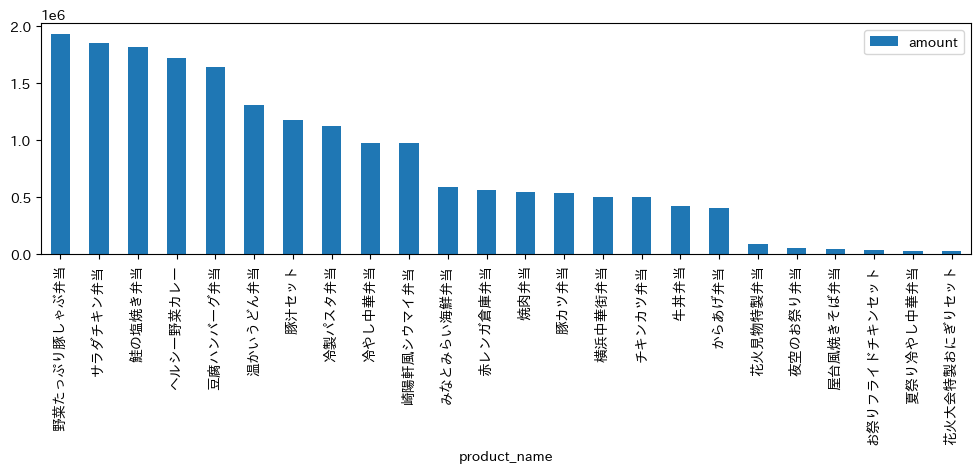

In [13]:
(df_pos
 .group_by("product_name")
 .agg(pl.col("amount").sum())
 .sort("amount",descending=True)
 .to_pandas()
 .plot(kind="bar", x="product_name", y="amount", figsize=(12,3))
 )

In [14]:
(df_pos
 .with_columns(
     pl.col("datetime")
     .str.strptime(pl.Date,"%Y/%m/%d %H:%M")
     .dt.month()
     .alias("month")
 )
 )

datetime,product_name,amount,payment_method,customer_type,month
str,str,i64,str,str,i8
"""2024/1/1 17:34""","""崎陽軒風シウマイ弁当""",1200,"""現金""","""tourist""",1
"""2024/1/1 13:33""","""崎陽軒風シウマイ弁当""",1200,"""カード""","""tourist""",1
"""2024/1/1 15:24""","""崎陽軒風シウマイ弁当""",1200,"""カード""","""tourist""",1
"""2024/1/1 11:35""","""崎陽軒風シウマイ弁当""",1200,"""現金""","""tourist""",1
"""2024/1/1 14:24""","""崎陽軒風シウマイ弁当""",1200,"""現金""","""tourist""",1
…,…,…,…,…,…
"""2024/12/31 14:35""","""崎陽軒風シウマイ弁当""",1200,"""電子マネー""","""tourist""",12
"""2024/12/31 13:05""","""崎陽軒風シウマイ弁当""",1200,"""電子マネー""","""tourist""",12
"""2024/12/31 12:34""","""崎陽軒風シウマイ弁当""",1200,"""カード""","""tourist""",12
